# 이미지 처리 기초

이미지 데이터를 표현하는 방식과 이미지 데이터를 처리하기 위한 파이썬 패키지인
Pillow, Scikit-image, OpenCV 패키지

## OpenCV : 이미지와 영상 작업을 위한 라이브러리.

In [1]:
pip install openCV-python

Note: you may need to restart the kernel to use updated packages.


# 엣지 추출

#### 엣지(edge) : 이미지 안에서 픽셀의 값이 갑자기 변하는 곳
#### 픽셀값이 변하는 구간을 찾아 경계선을 구분한다


#### openCV에서 'Sobel', 'Laplacian'명령으로 구분한다
#### Sobel 연산 : 수평과 수직 방향의 미분 값 두개를 사용 / 에지의 기울기 계산

#### Sobel : 3x3크기의 행렬 연산을 하였을때 중심을 기준 각방향의 앞뒤 값을 비교하여 변화량을 검출하는 알고리즘
#### laplacian 연산 : 픽셀 값의 높이 변화율 계산 / 부드러운 부분과 급격한 부분 감지

In [2]:
# sckit-image 라이브러리에서 text 모듈 가져오기
from skimage.data import text

# OpenCV 라이브러리 불러오기
import cv2

# Matplotlib : 데이터 시각화를 할 때 사용되는 명령어
import matplotlib.pyplot as plt

C:\Users\mgahn\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# scikit-image 라이브러리의 text 모듈에서 이미지 데이터를 img 변수에 저장
img = text() 

# 이미지에 수평방향의 엣지검출 수행
# img에 Sobel연산을 적용한 결과를 'sobel' 변수에 저장
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)

# 이미지에 수직방향의 엣지검출 수행
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)

# 이미지에 Laplacian 연산을 적용
laplacian = cv2.Laplacian(img, cv2.CV_8U)

# 데이터 시각화를 위한 Matplotlib 명령어
import cv2
import matplotlib.pyplot as plt

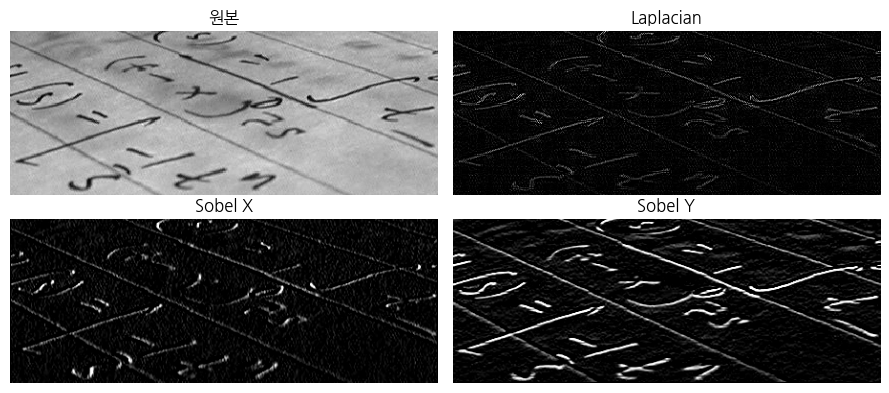

In [5]:
# 전체 그림의 크기를 설정
plt.figure(figsize=(9, 4))

# 첫 번째 서브플롯: 원본 이미지를 흑백으로 표시.
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('원본')
plt.axis("off")  # 축을 비활성화

# 두 번째 서브플롯: Laplacian 연산 결과를 흑백 이미지로 표시
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian') 
plt.axis("off") 

# 세 번째 서브플롯: Sobel X 연산 결과를 흑백 이미지로 표시
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off") 

# 네 번째 서브플롯: Sobel Y 연산 결과를 흑백 이미지로 표시
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off") 

# 한국어 폰트 설정 
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

# 서브플롯 간의 간격을 자동으로 조정
plt.tight_layout()

plt.show()


# 캐니 엣지 추출 
### 케니 엣지 추출법 : 그레디언트(픽셀의 변화량)의 크기 뿐 아니라 방향도 사용
### Nonmaximal suppression을 이용하여 최댓값 근처의 그레디언트 값을 제거

#

## 엣지추출과 케니 엣지 추출의 차이
### 엣지 추출은 이미지에서 갑자기 변하는 부분을 찾아내는 일반적인 기술
### 케니 엣지 검출은 엣지 추출의 특정 방법 중 하나. 정확하고 안정적인 결과를 얻을 수 있도록 여러 과정을 포함한 알고리즘

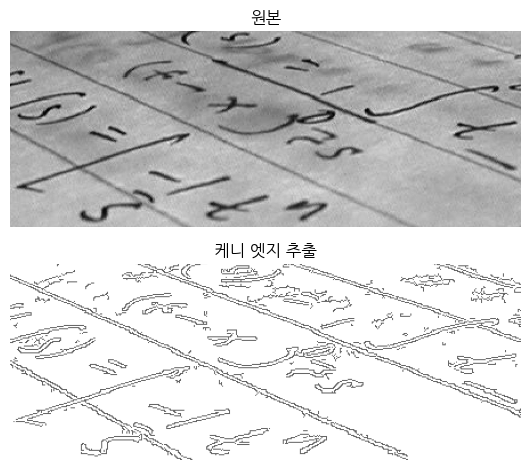

In [39]:
# scikit-image 라이브러리에서 'text' 모듈을 사용하여 이미지 데이터를 불러오기
img = text()

# 케니 엣지 추출을 사용하여 이미지의 엣지 찾기. (임계값: 50, 100)
edges = cv2.Canny(img, 50, 100)

# 원본 이미지와 케니 엣지 검출 결과를 2x1 그리드로 시각화
# 첫 번째 서브플롯: 원본 이미지를 흑백으로 표시
plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("원본")
plt.axis('off')  # 축을 비활성화합니다.

# 두 번째 서브플롯: Canny 엣지 검출 결과를 반투명하게 표시.
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.6) # gray보다 grey가 더 많은 그레이 톤을 포함
plt.axis('off') 
plt.title("케니 엣지 추출")


plt.tight_layout()
plt.show()


# Edge 추출 결과 비교하기

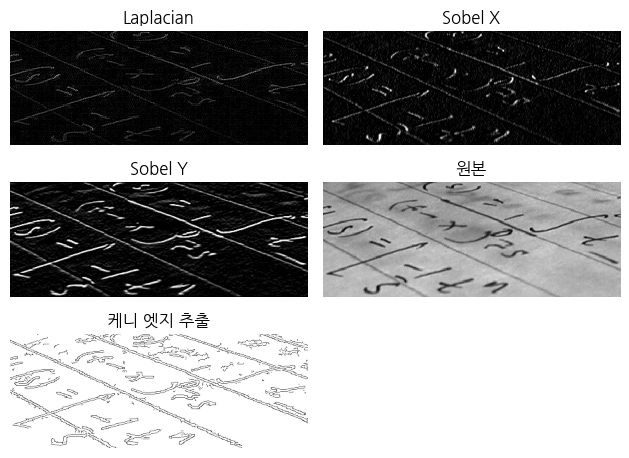

In [7]:
plt.subplot(3, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian') 
plt.axis("off") 

plt.subplot(3, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off") 

plt.subplot(3, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off") 

plt.subplot(3, 2, 4)
plt.imshow(img, cmap="gray")
plt.title("원본")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(edges, cmap="Greys", alpha=0.7)
plt.axis('off') 
plt.title("케니 엣지 추출")

plt.tight_layout()
plt.show()


# 코너 추출
### 코너(corner)는 엣지가 교차되는 점

## 해리스 코너 추출 함수 cornerHarris
### > 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 적절한 기준값으로 구별하여 코너점을 찾는다

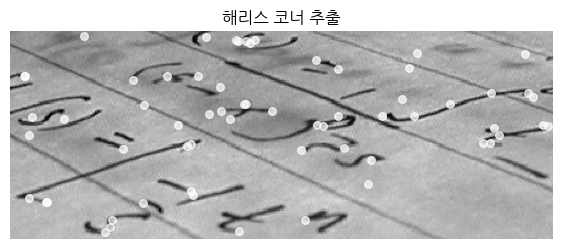

In [44]:
import numpy as np

# Harris 코너 감지 수행
dst = cv2.cornerHarris(img, 2, 3, 0.24)
#(img, blocksize, ksize, k)
# blocksize : 소벨커널의 범위
# ksize : 소벨 커널의 크기(3x3)
# k : 해리스코너 응답 함수의 상수 값, 높을수록 뚜렷한 코너감지, 낮을수록 미세한 코너 감지


# 이진화를 위한 임계값 적용
# 임계값을 넘는 값은 1로 이진화, 임계값을 넘지 못하는 값은 0으로 이진화
# dst : 이미지에서 높은 값은 코너로 간주되며, 낮은 값은 코너가 아닌 부분
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)

# 해리스 코너 감지는 각 픽셀의 코너 특징을 나타내는 값을 계산.
# 값은 픽셀이 코너인 정도를 나타냄, 이 값이 임계값보다 크면 코너로 판단
# 이진화된 결과에서 값이 1인 픽셀의 좌표 얻기
x, y = np.nonzero(dst)

# 결과를 시각화하여 코너 표시
plt.figure(figsize=(7, 7))
plt.title("해리스 코너 추출")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c="w", alpha=0.7)  # 코너를 흰색 점으로 표시
plt.show()


In [45]:
# dst 최댓값
dst_max = dst.max()
print(dst_max)

1.0


# Shi & Tomasi 코너 추출 함수

### 더 작은 변화를 보이는 방향의 변화량이 설정한 기준값보다 크면 코너라고 판단

### Harris 코너 추출과의 차이 : 모든 방향으로 변화량이 큰 지점을 코너라고 판단

C:\Users\mgahn\AppData\Local\Temp\ipykernel_12424\1738315633.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


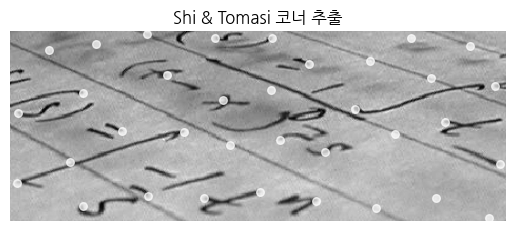

In [9]:
# Shi-Tomasi 코너 감지 수행
# (img, '최대 코너 수', '적응성 기준', '최소 유효거리')
# 최대 코너 수 : 찾고자 하는 최대 코너 포인트의 개수
# 적응성 기준 : 코너로 판단할 임게 값. 이보다 더 작은 코너 감지 결과는 무시된다(낮을수록 민감)
# 최소 유효거리 : 코너 포인트 사이의 최소 유효 거리. 이 거리보다 가까운 코너 포인트는 제거된다.
corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)

# 좌표값을 정수로 변환
corners = np.int0(corners)

# 결과를 시각화하여 코너 표시
plt.title("Shi & Tomasi 코너 추출")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c="w", alpha=0.7)  # 코너를 흰색 점으로 표시
plt.axis("off")
plt.show()


### 기준값을 더 낮춘 경우

C:\Users\mgahn\AppData\Local\Temp\ipykernel_12424\3198456874.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


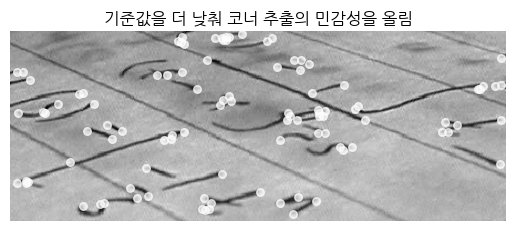

In [10]:
# Shi-Tomasi 코너 감지 수행 (설정값을 낮춤)
corners = cv2.goodFeaturesToTrack(img, 100, 0.00000001, 1) 


corners = np.int0(corners)

plt.title("기준값을 더 낮춰 코너 추출의 민감성을 올림")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c="w", alpha=0.7)  # 코너를 흰색 점으로 표시
plt.axis("off")
plt.show()



# 허프라인 변환
### 허프라인 변환을 사용하면 검출된 엣지로부터 직선을 이루는 부분을 찾아낼 수 있음

#
### Hough Transformation 방법은 모든 점이 아닌 임의의 점에 대해 (r, θ) 계산
### r = 픽셀 수(보통 1픽셀) / θ = 변환하고자 하는 각도 (π / 180)

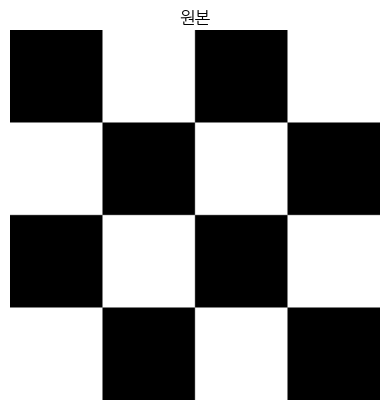

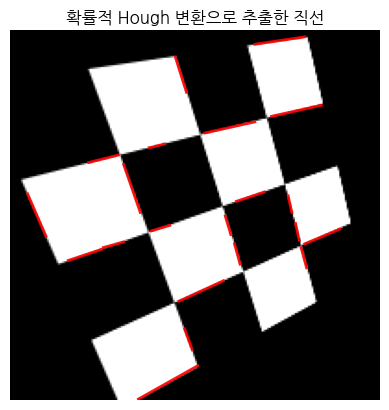

In [11]:
# Canny Detection 방법으로 엣지를 추출하고
# 추출한 엣지로부터 HoughLineP 함수를 사용해 직선 추출

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 체스보드 생성 함수 정의
def create_checkerboard(size=200, square_size=50):
    # 빈 행렬을 생성하고 모든 픽셀을 흰색 (255)으로 초기화.
    img = np.ones((size, size), dtype=np.uint8) * 255
    
    # 각 정사각형 칸에 대한 반복문
    for i in range(0, size, square_size):
        for j in range(0, size, square_size):
            # 체스보드 패턴을 만들기 위해 짝수 번째 칸을 검은색 (0)으로 설정.
            if (i // square_size + j // square_size) % 2 == 0:
                img[j:j+square_size, i:i+square_size] = 0
                
    # 완성된 체스보드 이미지를 반환.
    return img

# 체스보드 생성 함수 호출
img = create_checkerboard()
rows, cols = img.shape

# 원본 이미지 출력
plt.imshow(img, cmap="gray")
plt.title("원본")
plt.axis("off")
plt.show()

# 원근 변환을 위한 좌표 지정
pts1 = np.float32([[25, 25], [175, 25], [25, 175], [175, 175]])
pts2 = np.float32([[25, 50], [150, 25], [75, 175], [175, 125]])

# 'np.float32' : 원근 변환 행렬 계산과 같은 수학적 연산을 수행할 경우, 일반적으로 더 높은 정밀도를 요구
# ->  32비트 부동소수점 형식 사용
# 일반적으로 충분한 정밀도를 제공하면서 메모리 사용을 효율적으로 관리 가능

# pts1 : 원래 이미지에서 원근 변환을 수행할 네 개의 꼭짓점 좌표.
# 첫 번째 좌표는 좌상단, 두 번째 좌표는 우상단
# 세 번째 좌표는 좌하단, 네 번째 좌표는 우하단에 해당

# pts2는 원근 변환 후의 이미지에서 각 좌표가 매핑될 위치를 나타내는 좌표.
# 첫 번째 좌표는 변환 후 좌상단, 두 번째 좌표는 변환 후 우상단
# 세 번째 좌표는 변환 후 좌하단, 네 번째 좌표는 변환 후 우하단에 해당.


# 원근 변환 행렬 계산
H = cv2.getPerspectiveTransform(pts1, pts2)  # pts1에서 pts2로의 원근 변환 행렬을 계산.
img_warped = cv2.warpPerspective(img, H, (cols, rows))  # 계산된 원근 변환 행렬을 사용하여 이미지 변환.

# Canny 엣지 검출 수행
edges = cv2.Canny(img_warped, 100, 150, apertureSize=3)  # 원근 변환된 이미지에서 엣지를 검출.

# 확률적 Hough 변환을 사용하여 직선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50, 8)  # Canny 엣지 이미지에서 확률적 Hough 변환을 수행하여 직선을 검출.

# 결과 이미지에 검출된 직선 그리기
plt.imshow(img_warped, cmap="gray")  # 원근 변환된 이미지를 흑백으로 출력.
plt.title("Perspective concerted image")
plt.axis("off") 

# 검출된 직선을 빨간색으로 표현.
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=2, alpha=0.9)

plt.title("확률적 Hough 변환으로 추출한 직선") 
plt.axis("off")  
plt.show() 



# 이미지 히스토그램

### 히스토그램 : 데이터 집합에서 특정 구간의 값을 가지는 데이터의 갯수 
### 이미지 히스토그램은 이미지에서 특정 밝기 구간에 들어가는 픽셀의 수

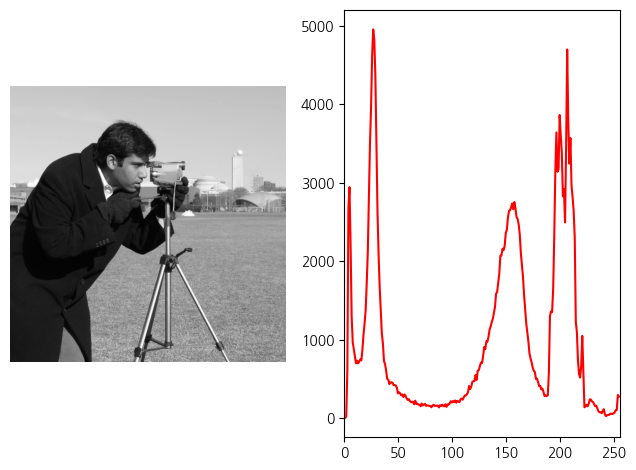

In [12]:
# 이미지 불러오기
from skimage.data import camera
img = camera()

# 이미지 픽셀 값의 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# hist 변수에는 이미지의 픽셀 값 빈도수를 나타내는 히스토그램이 저장
# [0]은 이미지의 채널 인덱스를 나타내며, 이 코드에서는 흑백 이미지이므로 [0]이 사용됨.
# [256]은 히스토그램의 빈(bin = 가로축)의 수를 나타내며, 픽셀 값의 범위는 0에서 255이므로 256으로 설정.
# [0, 256]은 픽셀 값의 범위. (최소값 0부터 최대값 255까지)


# 원본 이미지와 히스토그램을 나란히 출력
plt.subplot(121)
plt.imshow(img, "gray")  # 흑백 이미지 출력
plt.axis("off")  # 축을 표시하지 않도록 설정

plt.subplot(122)
plt.plot(hist, color='r')  # 히스토그램을 빨간색으로 그림
plt.xlim([0, 256])  # x축 범위 설정
plt.tight_layout() 
plt.show()  


## 컬러 사진에서 RGB의 픽셀값을 히스토그램으로 표현하기

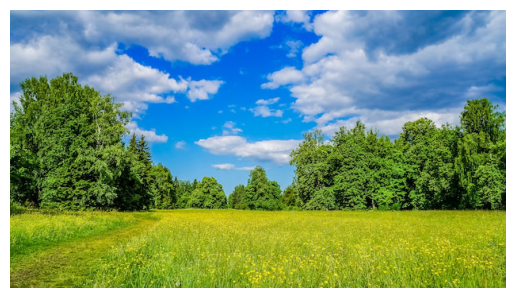

In [13]:
# 이미지 불러오기 (컬러 이미지)
from skimage import io

# 이미지 URL 또는 파일 경로를 지정하여 컬러 이미지를 불러옵니다.
img_url = "https://img.freepik.com/premium-photo/alpine-meadow-atmospheric-landscape-of-majestic-nature-scenic-mountainscape-wonderful-wild-scenery_158388-2222.jpg"
color_img = io.imread(img_url)

# 불러온 컬러 이미지 출력
plt.imshow(color_img)
plt.axis('off')  # 축을 표시하지 않도록 설정
plt.show()

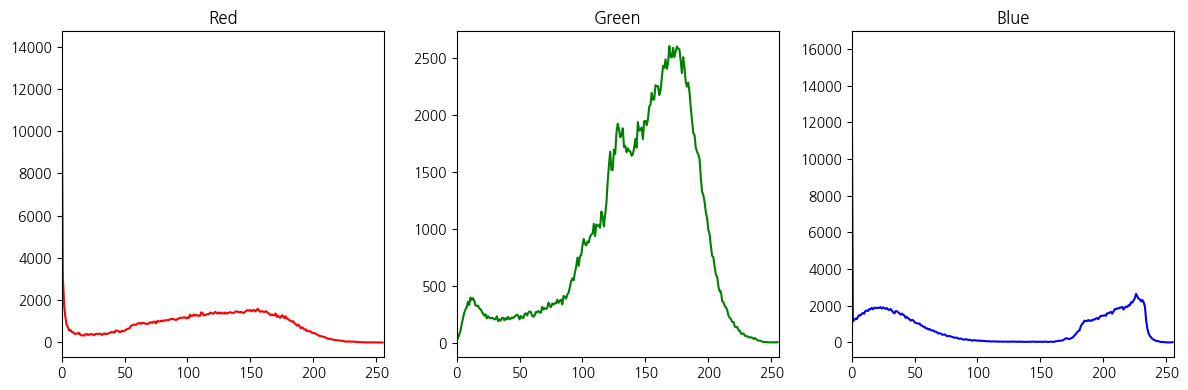

In [14]:
# 컬러 이미지의 색상 히스토그램 계산 및 출력
hist_red = cv2.calcHist([color_img], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([color_img], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([color_img], [2], None, [256], [0, 256])

# 히스토그램 시각화
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(hist_red, color='red')
plt.title('Red')
plt.xlim([0, 256])

plt.subplot(132)
plt.plot(hist_green, color='green')
plt.title('Green')
plt.xlim([0, 256])

plt.subplot(133)
plt.plot(hist_blue, color='blue')
plt.title('Blue')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

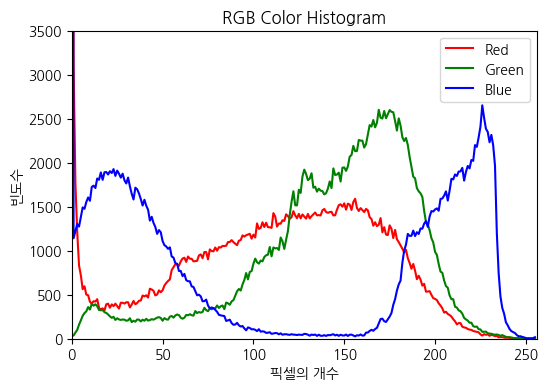

In [15]:
# 컬러 이미지의 색상 히스토그램 계산
hist_red = cv2.calcHist([color_img], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([color_img], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([color_img], [2], None, [256], [0, 256])

# Y축 최댓값 설정
max_y_value = 3500

# 히스토그램 시각화를 한 서브플롯으로 표현
plt.figure(figsize=(6, 4))

# Red 색상 채널의 히스토그램 선 그래프
plt.plot(hist_red, color='red', label='Red')
# Green 색상 채널의 히스토그램 선 그래프
plt.plot(hist_green, color='green', label='Green')
# Blue 색상 채널의 히스토그램 선 그래프
plt.plot(hist_blue, color='blue', label='Blue')

plt.title('RGB Color Histogram')
plt.xlabel('픽셀의 개수')
plt.ylabel('빈도수')
plt.xlim([0, 256])
plt.ylim([0, max_y_value])  # Y축 최댓값 설정
plt.legend()
plt.show()

# 그레디언트 히스토그램 설명자
### 특징점의 주변 특성을 이용해 해당 특징점을 표현하는 벡터를 만들어 이미지에서 같은 특징점 매치 or 추출

 1. 특징점을 중심으로 16x16 영역을 4x4 크기의 16개 윈도우로 나눈다
 2. 윈도우의 16개 포인트에서 그레디언트 벡터의 크기와 방향을 계산한다
 3. 그레디언트 벡터의 방향을 8개의 각도로 라운딩
 3-1. 라운딩 : 히스토그램의 값을 일정한 간격으로 묶어서 근사화하는 과정
 4. 8개의 각도에 대해 그레디언트 벡터의 크기를 더하여 그레디언트 히스토그램 생성
 5. 윈도우 16개의 히스토그램을 모두 모으면 특징점 주변에 대한 정보가 128(8x16)차원의 벡터로 표현

그레디언트 히스토그램 설명자는 이미지의 그레디언트(경사도) 정보를 활용하여 이미지를 특징적으로 표현하는 방법 중 하나.

이미지의 그레디언트는 해당 위치에서의 픽셀 값 변화의 방향과 크기를 나타내며, 이미지의 엣지와 경계를 특징 짓는 데에 유용.

그레디언트 히스토그램 설명자는 이미지를 일정한 크기의 그리드로 나누고, 각 그리드 셀에서의 방향과 크기를 이용하여 히스토그램을 생성

이를 이용하여 이미지의 특징을 나타내고, 이를 활용하여 이미지 검색, 객체 인식, 영상 분할 등의 다양한 컴퓨터 비전 작업에 활용

각 열은 해당 그리드 셀에서 특정 방향 범위에 속하는 그레디언트 크기의 합을 나타낸다

특정 방향 범위는 0도에서 360도까지를 일정한 간격으로 분할한 값.

이 범위 내에서 그레디언트의 크기가 얼마나 분포되어 있는지를 나타내며 클수록 해당 방향의 그레디언트가 강하게 나타남을 의미

# SIFT(Scale-Invariant Feature Transform)

### 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법
### 특징점 근처의 이미지 특성도 같이 계산하여 특징점 이미지의 모양도 구별할 수 있다

SIFT에서 "특이한 부분"이란 이미지에서 유일하고 독특한 패턴이나 구조를 의미한다
이러한 부분은 주변 영역과 비교했을 때 독자적인 모양, 질감, 색상 또는 에지(Edge)와 같은 시각적 특징을 가지고 있다. 

In [16]:
from skimage.data import camera
import cv2

# 카메라 이미지 불러오기 
img = camera()

# SIFT 설명자 생성
sift = cv2.SIFT_create()

# 이미지의 높이와 너비 가져오기
rows, cols = img.shape

# 이미지를 90도 회전시키고 크기 조정
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)
img_rotated = cv2.warpAffine(img, H, (cols, rows))

# 원본 이미지와 회전 이미지에서 SIFT 특징점과 디스크립터 추출
kps, des = sift.detectAndCompute(img, None)
kps_r, des_r = sift.detectAndCompute(img_rotated, None)

# 첫 번째 특징점의 정보 출력
kp0 = kps[0]
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[1], kp0.size, kp0.angle))
# PT : 추출된 특징점의 위치를 나타내는 속성. 

pt=(3.8693153858184814,185.40830993652344), size=2.643397092819214, angle=271.9088134765625


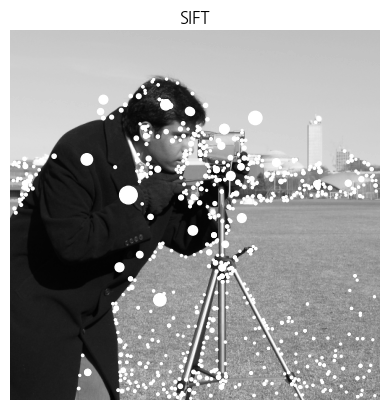

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# BF(Brute-Force)Matcher 객체 생성
# 두 이미지 간의 특징점을 매칭시키는데 사용 / 특징점 조합에 대해 거리를 계산
bf = cv2.BFMatcher_create()

# 두 이미지의 SIFT 설명자 간 매칭 수행
matches = bf.knnMatch(des, des_r, k=2)
# bf.knnMatch('첫번째 사진의 SIFT 설명자', '두번째 사진의 SIFT 설명자', '최근접 이웃의 개수')

# 좋은 매칭점 선별 (distance 값의 비율을 기준으로)
good = []
# 각 매칭 결과를 하나씩 가져옴
for m, n in matches: # 매칭 결과 나타냄 - 특징점에 대한 정보 포함 / m과 n은 두 이미지의 특징점 간의 매칭
    if m.distance < 0.4 * n.distance: # 특징점 간의 거리 비율을 기준으로 좋은 매칭점을 선별
        # 거리 비율이 0.4보다 작으면 좋은 매칭으로 간주하고 'good'리스트에 추가
        # 0.4보다 크면 무시
        good.append([m]) 

# 좋은 매칭점을 무작위로 섞기
np.random.shuffle(good)

# 상위 10개의 좋은 매칭점을 시각화하여 이미지에 표시
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)
# (첫번째 이미지, 특징점 리스트, 두번째 이미지, 특징점 리스트, 좋은 매칭점의 첫 10개, 상위 2개의 최근접 이웃, 표시하기)

# 선 두껍게 하기
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# SIFT 특징점의 x, y 좌표 및 크기 추출
pts_x = [kp.pt[0] for kp in kps] # 특징점의 x좌표 추출
pts_y = [kp.pt[1] for kp in kps] # 특징점의 y좌표 추출
pts_s = [kp.size for kp in kps] # 특징점의 크기 추출

# 이미지와 SIFT 특징점 시각화
plt.imshow(img, cmap="gray")
plt.title("SIFT")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w") # 특징점의 x,y 좌표를 흰색으로 표시
plt.show()


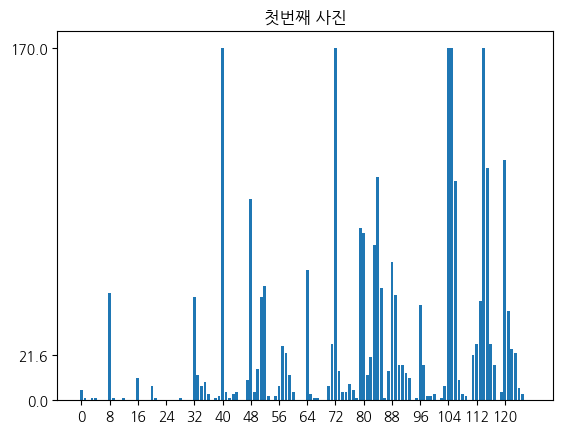

In [18]:
# 첫 번째 SIFT 디스크립터를 막대 그래프로 시각화.
plt.bar(np.arange(len(des[0])), des[0])

# x축 눈금을 8 단위로 설정.
plt.xticks(range(0, len(des[0]), 8))

# y축 눈금을 첫 번째 SIFT 디스크립터의 최솟값, 평균값, 최댓값으로 설정.
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])

plt.title("첫번째 사진")

plt.show()

# 첫 번째 SIFT 디스크립터를 구성하는 값들을 막대 그래프로 시각화.
# x축은 디스크립터의 각 차원을 나타내며, y축은 해당 차원의 값.
# 디스크립터는 벡터이기 때문에 각 차원의 값은 그래프에서 막대의 높이로 표시됨.

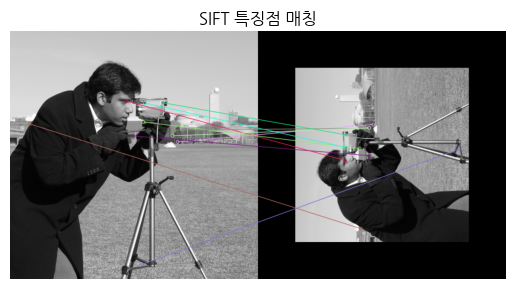

In [19]:
# SIFT 특징점 매칭 결과를 이미지로 시각화합니다.
plt.imshow(image_match)

plt.title("SIFT 특징점 매칭")

# 축을 표시하지 않도록 설정합니다.
plt.axis("off")

plt.show()


90도로 사진을 돌리고 사진의 크기를 줄여도 특징점을 매치하여 연결하는 직선을 그릴 수 있음

# SURF(Speed-Up Robust Features)
### 인텐서티 계산 방법을 간략화 하는 방법으로 SIFT 방법의 속도와 안정성을 개선한 것
### 이미지에 대해 surf 특징을 찾고 이미지에서 같은 특징점끼리 매칭하는 작업

In [20]:
import cv2
from skimage.data import camera

# 카메라 이미지 불러오기
img = camera()

# ORB 객체 생성
orb = cv2.ORB_create()

# 특징점 검출과 기술자 계산
kps, des = orb.detectAndCompute(img, None)

# 이미지를 90도 회전시키고 크기 조정
rows, cols = img.shape
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)
img_rotated = cv2.warpAffine(img, H, (cols, rows))

# 회전된 이미지에 대해도 동일한 작업 수행
kps_r, des_r = orb.detectAndCompute(img_rotated, None)

# 첫 번째 특징점의 정보 출력
kp0 = kps[0]
print("pt=({},{}), size={}".format(kp0.pt[0], kp0.pt[1], kp0.size))

pt=(264.0,178.0), size=31.0


#### ORB는 이미지에서 특징점을 검출하고, 이러한 특징점들의 기술자를 계산하는 알고리즘

#### ORB는 FAST (Features from Accelerated Segment Test) 특징점 검출 방법과
#### BRIEF (Binary Robust Independent Elementary Features) 기술자 계산 방법을 결합한 방법

#### FAST 알고리즘은 이미지에서 빠르게 특징점을 찾아내는 데 사용되며
#### BRIEF 알고리즘은 특징점 주변 영역에서 이진 기술자를 계산
#### ORB는 회전에 강인하고 빠른 연산 속도를 제공하면서도 정확한 매칭을 할 수 있는 특징을 가지고 있다.

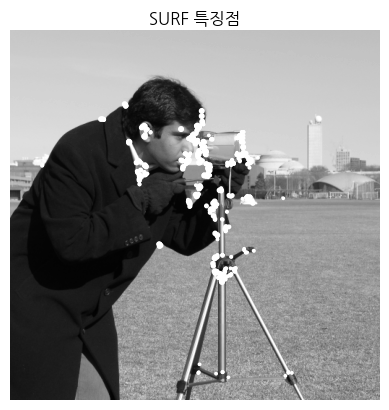

In [21]:
# BFMatcher 객체 생성
bf = cv2.BFMatcher_create()

# 두 이미지의 SURF 디스크립터 간 매칭 수행
# SURF는 SIFT보다 속도와 정확도가 뛰어난 특징을 가지고 있다
matches = bf.knnMatch(des, des_r, k=2)

# 좋은 매칭점 선별 (distance 값의 비율을 기준으로)
good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

# 좋은 매칭점을 무작위로 섞기
np.random.shuffle(good)

# 상위 10개의 좋은 매칭점을 시각화하여 이미지에 표시
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

# SURF 특징점의 x, y 좌표 및 크기 추출 (크기를 적절히 조절하여 시각화)
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size / 10 for kp in kps]

# 이미지와 SURF 특징점 시각화
plt.imshow(img, cmap='gray')
plt.title("SURF 특징점")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

# BFMatcher는 두 이미지의 특징점 간 거리를 계산하여 매칭을 수행하는 객체
# SURF(Speeded-Up Robust Features)는 이미지의 특징점을 검출하고 기술자를 계산하는 알고리즘
# 이미지의 크기와 회전에 대해 불변인 특징점을 추출할 수 있다.

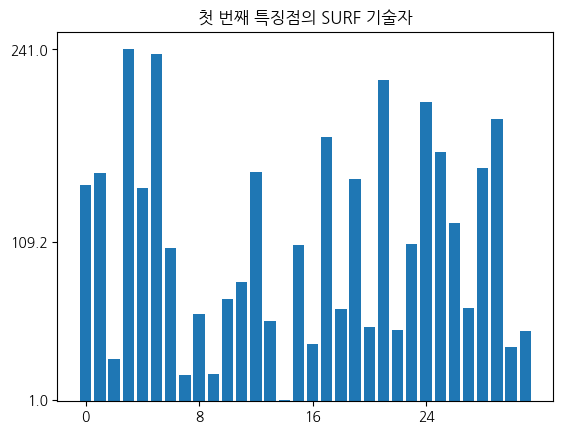

In [22]:
# 첫 번째 특징점의 SURF 기술자를 막대 그래프로 시각화.
plt.bar(np.arange(len(des[0])), des[0])

# x축 눈금을 8 단위로 설정합니다.
plt.xticks(range(0, len(des[0]), 8))

# y축 눈금을 첫 번째 특징점의 SURF 기술자 값의 최솟값, 평균값, 최댓값으로 설정합니다.
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])

plt.title("첫 번째 특징점의 SURF 기술자")
plt.show()

# 첫 번째 특징점의 SURF 기술자를 시각화
# x축은 SURF 기술자의 인덱스, y축은 해당 기술자의 값
# 눈금은 x축의 간격을 조정하고, y축의 값 범위를 표시하기 위해 설정.


# FAST(Features from Accelerated Segment Test) : 코너를 찾는 알고리즘
### 특징 : 한  픽셀을 중심으로 하는 3픽셀의 반지름을 가지는 원을 만들고 그 원 위의 픽셀보다 기준값보다 밝거나 어두운 픽셀이 n개 이상 연속적으로 존재하면 코너로 인식

기준값:  10
nonmaxSuppression:  True
nonmaxSuppression 후처리 후, 추출된 전체 특징점:  6155


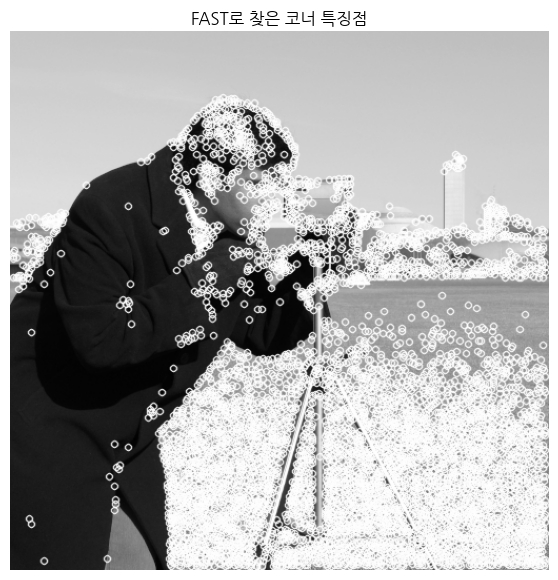

In [23]:
# FAST 특징점 검출기 객체를 생성.
fast = cv2.FastFeatureDetector_create()

# 이미지에서 FAST 특징점을 검출.
kps = fast.detect(img, None)

# 검출된 특징점을 원본 이미지에 표시.
img2 = cv2.drawKeypoints(img, kps, img, color=(255, 255, 255))

# FAST 검출에 사용된 기준값, nonmaxSuppression 여부, 후처리 후 추출된 전체 특징점 개수를 출력.
# non-maximal_Suppression : 한 점이 코너로 인식되면 주변 점도 코너로 인식 - 이를 막고자 후처리하는 방법
print("기준값: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("nonmaxSuppression 후처리 후, 추출된 전체 특징점: ", len(kps))

# 이미지와 검출된 특징점을 시각화하여 출력.
plt.figure(figsize=(7, 7))
plt.imshow(img2, cmap='gray')
plt.title("FAST로 찾은 코너 특징점")
plt.axis("off")
plt.show()

# FAST는 코너(또는 코너와 유사한 부분)를 빠르게 검출하는 알고리즘.
# 이 코드에서는 FAST를 사용하여 이미지에서 특징점을 검출하고, 그 결과를 시각화.
# 기준값은 FAST 검출에서 사용된 임계값
# nonmaxSuppression : 비최대 억제 여부(국지적인 최대값을 찾아 그 값만 남기고 나머지 값은 모두 삭제하는 알고리즘)를 나타냅니다.


# ORB(Oriented Fast and Rotated BRIEF) : FAST와 BRIEF를 기반으로 만들어짐

### ORB는 SURF와 SIFT보다 빠르고 정확하며 메모리 소요가 적다

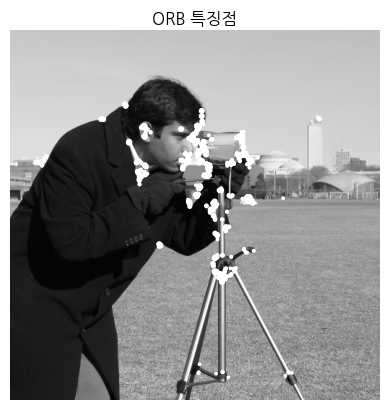

In [24]:
# ORB(Oriented FAST and Rotated BRIEF) 특징점 검출과 디스크립터 계산을 위한 ORB 객체를 생성
orb = cv2.ORB_create()

# 원본 이미지와 회전된 이미지에서 ORB 특징점과 디스크립터를 추출.
kps, des = orb.detectAndCompute(img, None)
kps_r, des_r = orb.detectAndCompute(img_rotated, None)

# BFMatcher 객체를 생성합니다.
bf = cv2.BFMatcher_create()

# 두 이미지의 ORB 디스크립터 간 매칭 수행 
matches = bf.knnMatch(des, des_r, k=2)

# 좋은 매칭점 선별 (distance 값의 비율 기준)
good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

# 좋은 매칭점을 무작위로 섞어 시각화를 위한 상위 10개 매칭점을 선택.
np.random.shuffle(good)
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

# ORB 특징점의 x, y 좌표 및 크기 추출 (크기를 시각화를 위해 조절)
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size / 10 for kp in kps]

# 이미지와 ORB 특징점 시각화
plt.imshow(img, cmap='gray')
plt.title("ORB 특징점")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()


# ORB는 FAST 특징점 검출과 BRIEF 디스크립터 계산을 기반으로 하는 알고리즘.
# ORB를 사용하여 두 이미지에서 특징점과 디스크립터를 추출하고, 그 결과를 시각화.
# BFMatcher를 사용하여 두 이미지의 ORB 디스크립터 간 매칭을 수행하고, 거리 비율을 기준으로 좋은 매칭점을 선별.
# 선별된 좋은 매칭점을 무작위로 섞은 뒤 상위 10개의 매칭점을 선택하여 시각화.
# 특징점의 크기를 시각화를 위해 조절하여 표시.


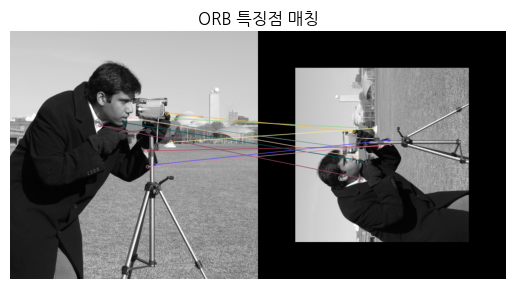

In [25]:
# 두 이미지의 ORB 특징점 매칭 결과를 시각화
plt.imshow(image_match)

plt.title("ORB 특징점 매칭")

plt.axis("off")

plt.show()